# Prediction of mood disorders among DASS survey participants

## Index
* [INTRODUCTION](#intro)
* [BUSINESS GOAL](#goal1)
* [DATA MINING GOALS](#goal2)
* [IMPORT DEPENDENCIES](#import)
* [DATA ACQUISITION](#data_collection)
* [DATA PREPROCESSING](#data_preprocessing)
 - [DATA CLEANING](#data_cleaning)
     - [CLEANING PART 1](#data_cleaning_part1)
     - [CLEANING PART 2](#data_cleaning_part2)

## Introduction <a class="anchor" id="intro"></a>

<p>The Taylor Manifest Anxiety Scale was first developed in 1953 to identify individuals who would be good subjects for studies of stress and other related psychological phenomenon. Since then it has been used as a measure of anxiety as general personality trait. Anxiety is a complex psychological construct that includes a multiple of different facets related to extensive worrying that may impair normal functioning. The test has been widely studied and used in research however there are some concerns that it does not measure a single trait but instead measures a basket of loosely related ones and so the score is not that meaningful.</p>

## Business Goal <a class="anchor" id="goal1"></a>

<ol>
<li>Detecting depression, anxiety, stress levels to prevent societal problems.</li>
</ol>

## Data Mining Goals <a class="anchor" id="goal2"></a>

<ol>
<li>Identifying current psychology state of the survey respondents using their given answers</li>
<li>Forecasting the potential mood disorders based on their survey responses</li>
</ol>

## Import dependencies <a class="anchor" id="import"></a>

In [46]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

## Data Acquisition <a class="anchor" id="data_collection"></a>

In [7]:
df = pd.read_csv('data.csv')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [10]:
df.dtypes

Q1A            int64
Q1I            int64
Q1E            int64
Q2A            int64
Q2I            int64
               ...  
race           int64
voted          int64
married        int64
familysize     int64
major         object
Length: 172, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


## Data Pre-processing <a class="anchor" id="data_preprocessing"></a>

### Data Cleaning <a class="anchor" id="data_cleaning"></a>

In [15]:
df.isna()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39771,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39772,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11403
Length: 172, dtype: int64

In [22]:
sum(df.isna().sum())

11405

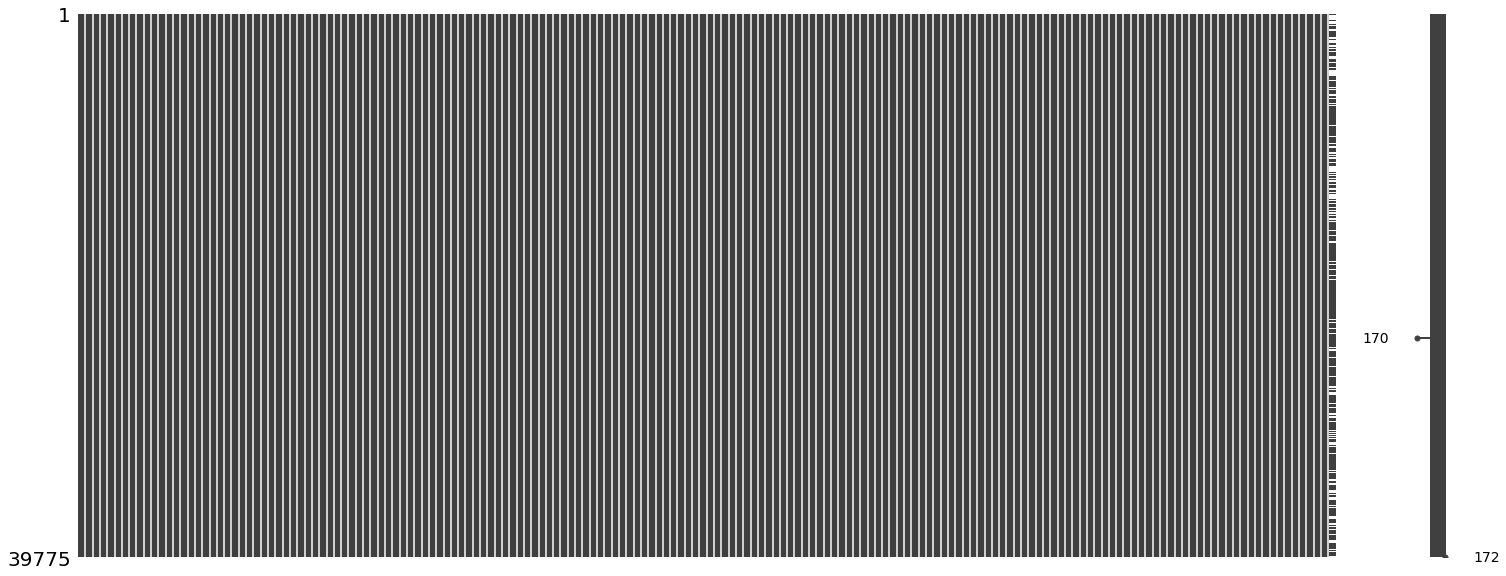

In [21]:
msno.matrix(df)
plt.show()
#plt.savefig('missing.png')

In [18]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


### Data Cleaning (Replacing Missing Values in Major Column) <a class="anchor" id="data_cleaning_part1"></a>

In [23]:
df['major'] = df['major'].fillna('Unknown')

In [47]:
df.isna().sum()

Q1A           0
Q1I           0
Q1E           0
Q2A           0
Q2I           0
             ..
race          0
voted         0
married       0
familysize    0
major         0
Length: 172, dtype: int64

In [25]:
sum(df.isna().sum())

2

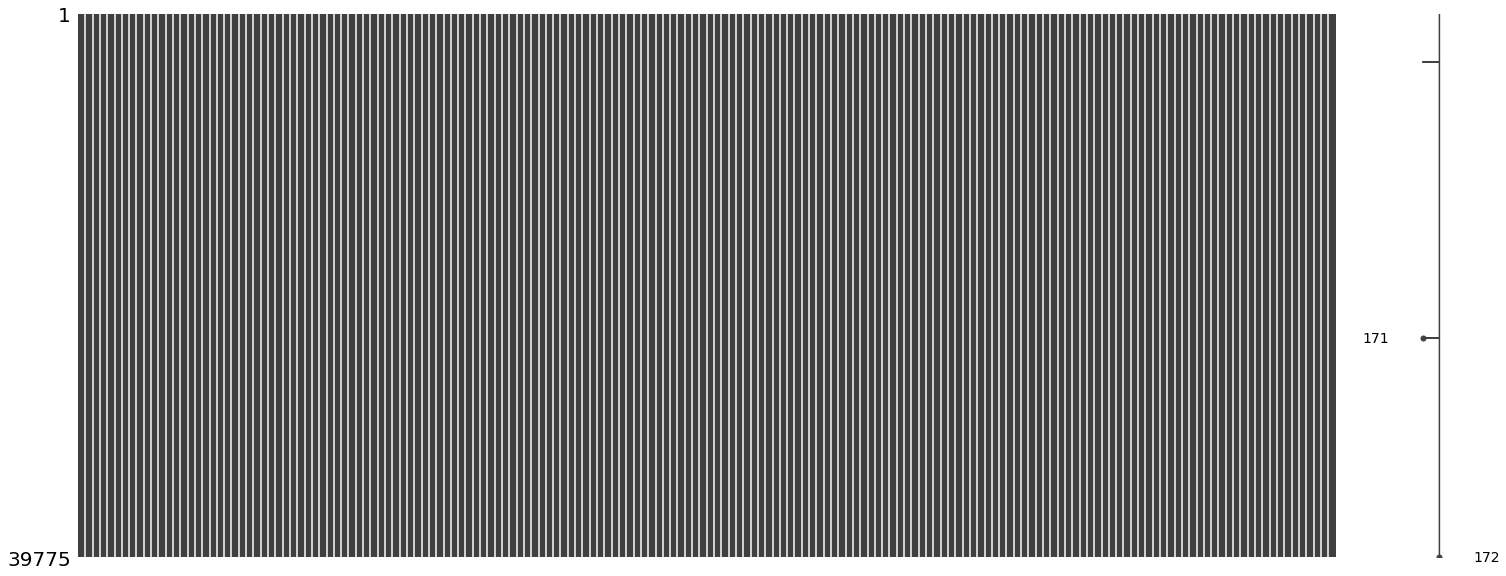

In [26]:
msno.matrix(df)
plt.show()
#plt.savefig('missing.png')

### Data Cleaning (Replacing Missing Values in Country Column) <a class="anchor" id="data_cleaning_part2"></a>

In [27]:
df.columns[df.isnull().any()]

Index(['country'], dtype='object')

In [30]:
null_data = df[df.isnull().any(axis=1)]

In [34]:
null_data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
3526,2,41,2104,3,38,1710,2,29,2036,2,...,2,1,1,3,3,60,2,3,2,Industrial and Organisational Psychology
23744,1,11,3330,4,38,3162,4,34,3164,2,...,1,1,1,1,2,60,2,1,3,Unknown


In [42]:
null_data.loc[:, :'country']

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country
3526,2,41,2104,3,38,1710,2,29,2036,2,...,1,31,3050,1,27,1598,2,1,48933,NaN
23744,1,11,3330,4,38,3162,4,34,3164,2,...,2,30,3833,3,41,2330,4,2,5156,NaN


In [35]:
df['country'] = df['country'].fillna('NONE')

In [37]:
sum(df.isna().sum())

0

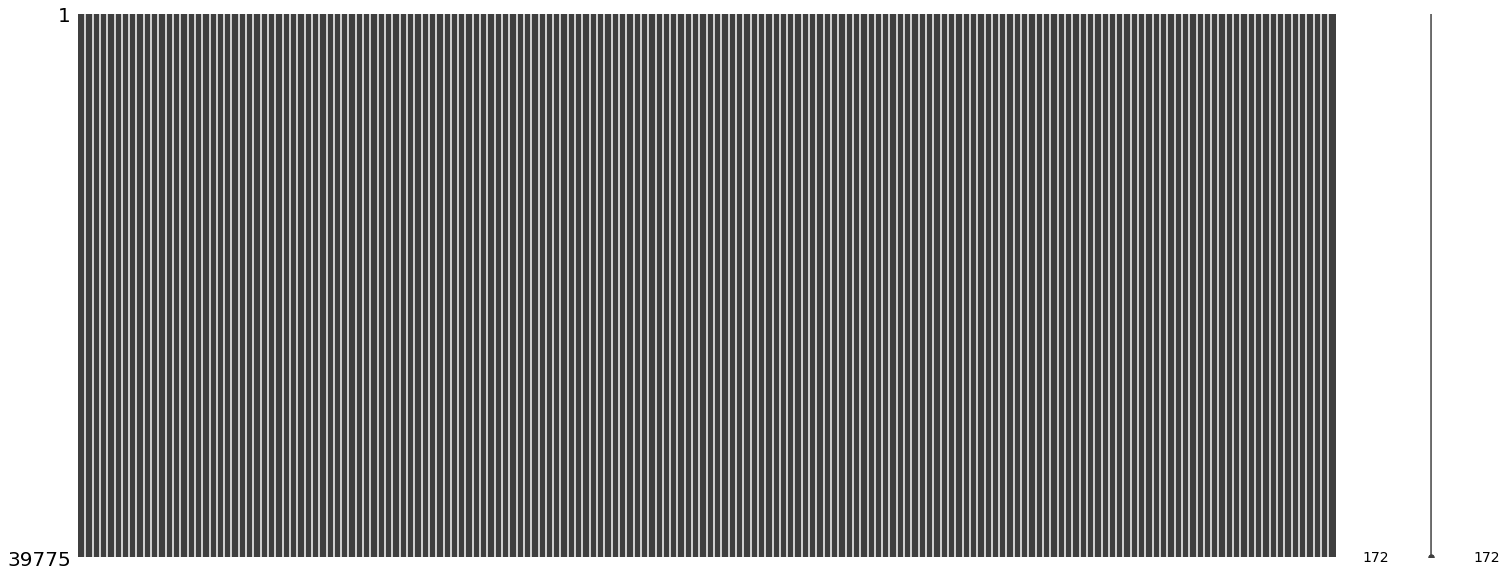

In [43]:
msno.matrix(df)
plt.show()
#plt.savefig('missing.png')